# Classification Problem - Wine Quality Classification
### In this notebook, I will classify differents variants of red wine by bad and good quality.

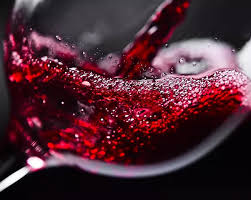

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



### Correlation Matrix: 

<AxesSubplot:>

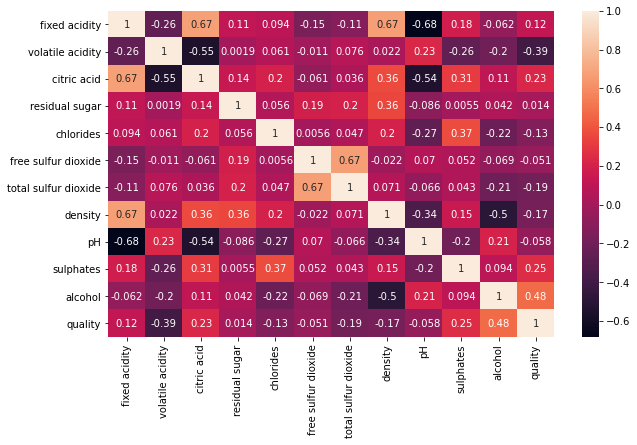

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

### We can see that alcohol has the best correlation with the quality (although far from perfect).
### In order to balance things out, I decided to devide the data to two groups: poor to average quality (3-5), and average to high quality (6-8).

In [6]:
group = []
for i in df["quality"]:
    if i <= 4:
        group.append("1")
    elif i == 5 or i == 6:
        group.append("2")
    elif i >= 7:
        group.append("3")
df["group"] = group

### How many variants in each group:

<AxesSubplot:xlabel='quality', ylabel='count'>

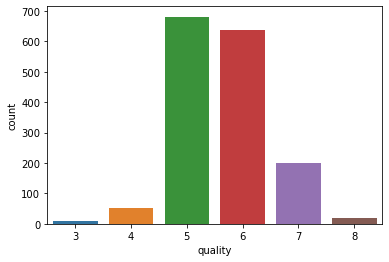

In [7]:
sns.countplot(x="quality", data=df)

### There is a normal distribution situation - there are more variants with average quality than variants with high or low quality. 

In [8]:
good_qual = len(df[df["group"] == "3"])
average_qual = len(df[df["group"] == "2"])
bad_qual = len(df[df["group"] == "1"])
print("Good quality wine: ", good_qual / len(df))
print("Average quality wine: ", average_qual / len(df))
print("Poor quality wine: ", bad_qual / len(df))

Good quality wine:  0.1357098186366479
Average quality wine:  0.8248905565978737
Poor quality wine:  0.039399624765478425


### There's a normal distribution situation here: average quality takes the crown with the most samples by a mile.
### Let's check the correlation between alcohol and quality:

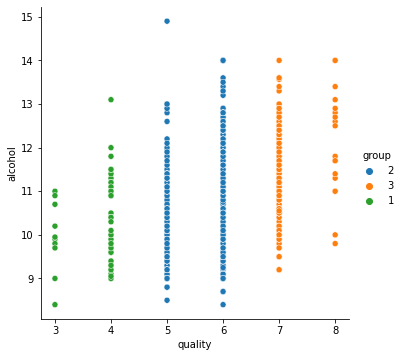

In [9]:
sns.pairplot(df, x_vars = ["quality"], y_vars =["alcohol"], hue = "group", height =5)  

### In many cases, if the wine contains more alcohol, it is of better quality (except for one outlier).

## Split to Training and Testing

In [26]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, 0:11]
y = df.iloc[:, 12]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =0)

In [28]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Model - K Nearest Neighbours
### K = 1 was the optimal option.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)

## Accuracy Check

              precision    recall  f1-score   support

           1       0.07      0.08      0.07        13
           2       0.92      0.88      0.90       277
           3       0.45      0.60      0.51        30

    accuracy                           0.82       320
   macro avg       0.48      0.52      0.50       320
weighted avg       0.84      0.82      0.83       320

Accuracy:  0.825


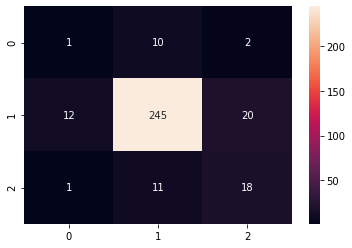

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
confmat = confusion_matrix(y_test, y_pred1)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, y_pred1)
acc_score1 = accuracy_score(y_test, y_pred1)
print(class_rep1)
print("Accuracy: ", acc_score1)

## Model - Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_pred2 = dt.predict(x_test)

## Accuracy Check

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.91      0.87      0.89       277
           3       0.38      0.60      0.46        30

    accuracy                           0.81       320
   macro avg       0.43      0.49      0.45       320
weighted avg       0.82      0.81      0.81       320

Accuracy:  0.809375


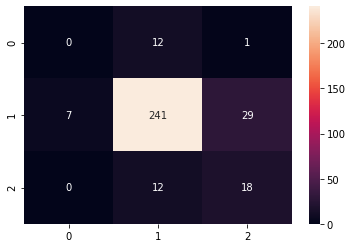

In [15]:
confmat2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(confmat2, annot = True, fmt = "d")
class_rep2 = classification_report(y_test, y_pred2)
acc_score2 = accuracy_score(y_test, y_pred2)
print(class_rep2)
print("Accuracy: ", acc_score2)

## Model - Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred3 = lr.predict(x_test)

C:\Users\yaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Accuracy Check

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.89      0.95      0.92       277
           3       0.43      0.33      0.38        30

    accuracy                           0.86       320
   macro avg       0.44      0.43      0.43       320
weighted avg       0.81      0.86      0.83       320

Accuracy:  0.85625


C:\Users\yaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


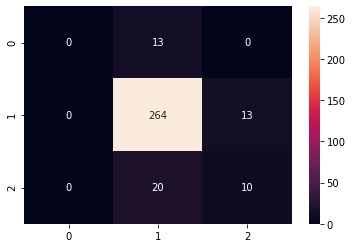

In [16]:
confmat3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(confmat3, annot = True, fmt = "d")
class_rep3 = classification_report(y_test, y_pred3)
acc_score3 = accuracy_score(y_test, y_pred3)
print(class_rep3)
print("Accuracy: ", acc_score3)

## Voting Classifier 

In [25]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('tree', model1), ('dt', model2), ('lr', model3)],voting='soft')
vc.fit(x_train, y_train)
y_pred4 = vc.predict(x_test)

C:\Users\yaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Accuracy Check

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.89      0.95      0.92       277
           3       0.43      0.33      0.38        30

    accuracy                           0.86       320
   macro avg       0.44      0.43      0.43       320
weighted avg       0.81      0.86      0.83       320

Accuracy:  0.878125


C:\Users\yaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


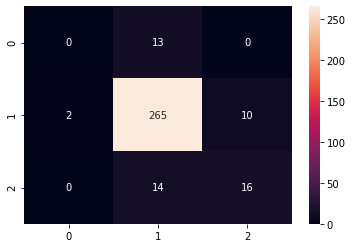

In [26]:
confmat4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(confmat4, annot = True, fmt = "d")
class_rep4 = classification_report(y_test, y_pred3)
acc_score4 = accuracy_score(y_test, y_pred4)
print(class_rep4)
print("Accuracy: ", acc_score4)

# FIN